In [10]:
import illustris_python as il
import matplotlib.pyplot as plt
import h5py
import numpy as np
import sys
sys.path.append('../py_files/')
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm
import host_galaxy_enhancement_plots as hostplot

In [11]:
import scienceplots
plt.style.use(['science'])
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

In [12]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_color = '#d95f02'

In [13]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_pop = {}
#brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_sim_pop[sim] = brahma_pop_Nstar10

In [14]:
TNG_50_pop["merging_population"].keys()

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'MgasInRad', 'Mstar', 'MstarInRad', 'Msubhalo', 'SFR', 'StellarHalfmassRad', 'SubhaloPhotoMag', 'prog_MBH', 'prog_Mdot', 'prog_Mgas', 'prog_MgasInRad', 'prog_Mstar', 'prog_MstarInRad', 'prog_SFR', 'prog_StellarHalfmassRad', 'prog_redshift', 'prog_snap', 'prog_subhalo_id', 'q_merger', 'snap', 'subhalo_ids', 'z']>

/tmp/ipykernel_542627/1361760533.py:24: RuntimeWarning: divide by zero encountered in log10
  N_MBH_brahma,_ = np.histogram(np.log10(brahma_sim_pop[sim]["merging_population"]['MBH'][:]),bins=MBH_bins)
/tmp/ipykernel_542627/1361760533.py:25: RuntimeWarning: divide by zero encountered in log10
  axes[1,0].hist(np.log10(brahma_sim_pop[sim]["merging_population"]['MBH'][:]),bins=MBH_bins,label=sim,histtype="step",color=brahma_sim_colors[sim],linewidth=2)
/tmp/ipykernel_542627/1361760533.py:26: RuntimeWarning: divide by zero encountered in log10
  N_MBH_TNG,_ = np.histogram(np.log10(TNG_50_pop["merging_population"]['MBH'][:]),bins=MBH_bins)
/tmp/ipykernel_542627/1361760533.py:27: RuntimeWarning: divide by zero encountered in log10
  axes[1,0].hist(np.log10(TNG_50_pop["merging_population"]['MBH'][:]),bins=MBH_bins,label='TNG50-1',histtype="step",color=TNG_color,linewidth=2)


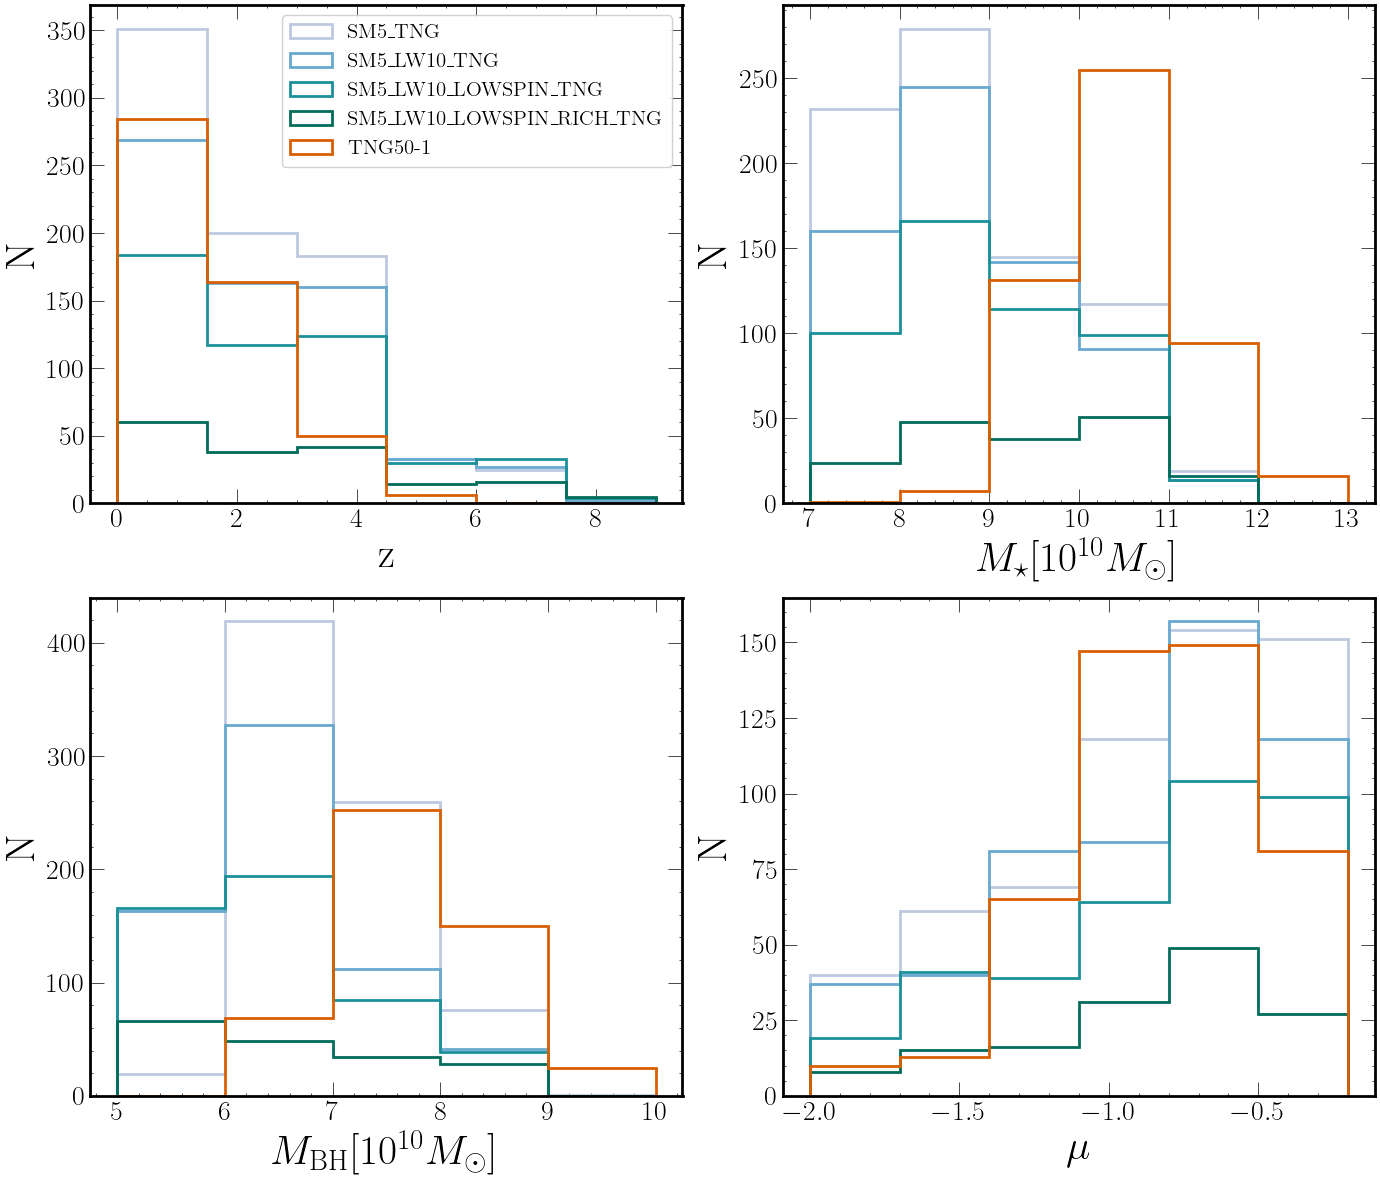

In [15]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,xticksize=10,yticksize=10,legendsize=15)
z_bins = np.arange(0,10,1.5)
fig,axes = plt.subplots(2,2,figsize=(14,12),sharey=False)

for sim in brahma_simName_array:
    Nz_brahma,_ = np.histogram(brahma_sim_pop[sim]["merging_population"]['z'][:],bins=z_bins)
    axes[0,0].hist(brahma_sim_pop[sim]["merging_population"]['z'][:],bins=z_bins,label=sim,histtype="step",color=brahma_sim_colors[sim],linewidth=2)

Nz_TNG,_ = np.histogram(TNG_50_pop["merging_population"]['z'][:],bins=z_bins)
axes[0,0].hist(TNG_50_pop["merging_population"]['z'][:],bins=z_bins,label='TNG50-1',histtype="step",color=TNG_color,linewidth=2)

axes[0,0].set_xlabel('z',fontsize=30)
axes[0,0].set_ylabel('N')
axes[0,0].legend()
#add box to the legend with transparent background
legend = axes[0,0].legend(frameon=True)
frame = legend.get_frame()
frame.set_alpha(0.9)
# axes[0].step((z_bins[:-1]+z_bins[1:])/2,Nz_TNG,where='post',label='TNG50-1',color='black')

MBH_bins = np.arange(5,11,1)

for sim in brahma_simName_array:
    N_MBH_brahma,_ = np.histogram(np.log10(brahma_sim_pop[sim]["merging_population"]['MBH'][:]),bins=MBH_bins)
    axes[1,0].hist(np.log10(brahma_sim_pop[sim]["merging_population"]['MBH'][:]),bins=MBH_bins,label=sim,histtype="step",color=brahma_sim_colors[sim],linewidth=2)
N_MBH_TNG,_ = np.histogram(np.log10(TNG_50_pop["merging_population"]['MBH'][:]),bins=MBH_bins)
axes[1,0].hist(np.log10(TNG_50_pop["merging_population"]['MBH'][:]),bins=MBH_bins,label='TNG50-1',histtype="step",color=TNG_color,linewidth=2)
axes[1,0].set_xlabel(r'$M_{\rm BH}[10^{10} M_{\odot}]$')
axes[1,0].set_ylabel('N')
Mstar_bins = np.arange(7,14,1)

for sim in brahma_simName_array:
    N_Mstar_brahma,_ = np.histogram(np.log10(brahma_sim_pop[sim]["merging_population"]['Mstar'][:]),bins=Mstar_bins)
    axes[0,1].hist(np.log10(brahma_sim_pop[sim]["merging_population"]['Mstar'][:]),bins=Mstar_bins,label=sim,histtype="step",color=brahma_sim_colors[sim],linewidth=2)
N_Mstar_TNG,_ = np.histogram(np.log10(TNG_50_pop["merging_population"]['Mstar'][:]),bins=Mstar_bins)
axes[0,1].hist(np.log10(TNG_50_pop["merging_population"]['Mstar'][:]),bins=Mstar_bins,label='TNG50-1',histtype="step",color=TNG_color,linewidth=2)
axes[0,1].set_xlabel(r'$M_{\star}[10^{10} M_{\odot}]$') 
axes[0,1].set_ylabel('N')

mu_bins = np.arange(-2,0,0.3)
for sim in brahma_simName_array:
    N_mu_brahma,_ = np.histogram(np.log10(brahma_sim_pop[sim]["merging_population"]['q_merger'][:]),bins=mu_bins)
    axes[1,1].hist(np.log10(brahma_sim_pop[sim]["merging_population"]['q_merger'][:]),bins=mu_bins,label=sim,histtype="step",color=brahma_sim_colors[sim],linewidth=2)

N_mu_TNG,_ = np.histogram(np.log10(TNG_50_pop["merging_population"]['q_merger'][:]),bins=mu_bins)
axes[1,1].hist(np.log10(TNG_50_pop["merging_population"]['q_merger'][:]),bins=mu_bins,label='TNG50-1',histtype="step",color=TNG_color,linewidth=2)
axes[1,1].set_xlabel(r'$\mu$')
axes[1,1].set_ylabel('N')
fig.tight_layout()
fig.savefig('../figures/merging_population_comparison_TNG50_BRAHMA_Nstar10.pdf')

In [32]:
TNG50_all_subhalos_file_loc = "/home/pranavsatheesh/host_galaxies/data/TNG-50_subhalo_statistics.hdf5"
TNG50_all_subhalos = h5py.File(TNG50_all_subhalos_file_loc)

brahma_all_subhalos  = {}
#brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    sim_file_loc = f"/home/pranavsatheesh/host_galaxies/data/{sim}_subhalo_statistics.hdf5"
    brahma_all_subhalos[sim] = h5py.File(sim_file_loc)

sim_names = brahma_simName_array + ['TNG50']
sim_colors = [brahma_sim_colors[sim] for sim in brahma_simName_array] + [TNG_color]
sim_all_subhalos = brahma_all_subhalos
sim_all_subhalos['TNG50'] = TNG50_all_subhalos
sim_zbins_list = [np.arange(0,10,1) for _ in brahma_simName_array] + [np.arange(0,6,1)]

In [33]:
TNG50_all_subhalos.keys()

<KeysViewHDF5 ['MBH', 'MdotBH', 'MgasinRad', 'Mgastotal', 'Mstar', 'MstarinRad', 'SFR', 'SubhaloHalfmassRadType', 'SubhaloLenType', 'snap', 'z']>